In [1421]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

En esta oportunidad veremos PCA y para ello, haremos uso de la base de datos houses.csv

In [1484]:
# Load the data from the CSV file
df = pd.read_csv("houses.csv")

In [1485]:
df.head(10)

,Id,Region,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price
0,0,South,1,1,53,592,2436,2663,963,High,550353
1,1,East,3,2,70,640,652,2532,510,High,780430
2,2,North,2,2,79,1831,1485,7837,586,Medium,455771
3,3,West,6,5,189,255,974,2523,1152,Low,766631
4,4,West,7,6,199,1602,584,9690,615,Medium,757092
5,5,South,7,5,178,327,460,1353,1650,Medium,885891
6,6,South,6,5,212,331,2228,9497,1136,Medium,633024
7,7,West,7,5,163,1361,1534,2729,1904,High,423277
8,8,South,7,4,171,1225,424,2896,971,Low,840965
9,9,West,7,4,120,1231,1520,3863,888,Medium,501169


¿Qué tipo de variables ves? ¿Qué se debe hacer primero?

In [1486]:
df.isna().sum()

Id                     0
Region                 0
Bedrooms               0
Bathrooms              0
Square_Meters          0
Dist_to_Park           0
Dist_to_Hospital       0
Dist_to_Underground    0
Dist_to_School         0
Crime_Rate             0
Price                  0
dtype: int64

Por comodidad intentaremos hacer uso de únicamente variables numéricas utilizando lo aprendido

In [1487]:
# One-hot encode the nominal variable 'Region'
one_hot = OneHotEncoder()
encoded_regions = one_hot.fit_transform(df[['Region']])
encoded_regions_df = pd.DataFrame(encoded_regions.toarray(), columns=one_hot.get_feature_names(['Region_']))
df = pd.concat([df, encoded_regions_df], axis=1)

/home/eng/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1488]:
# Drop the original 'Region' column
df = df.drop(['Region'], axis=1)
df = df.drop(['Id'], axis=1)

In [1489]:
df.head(10)

,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price,Region__East,Region__North,Region__South,Region__West
0,1,1,53,592,2436,2663,963,High,550353,0.0,0.0,1.0,0.0
1,3,2,70,640,652,2532,510,High,780430,1.0,0.0,0.0,0.0
2,2,2,79,1831,1485,7837,586,Medium,455771,0.0,1.0,0.0,0.0
3,6,5,189,255,974,2523,1152,Low,766631,0.0,0.0,0.0,1.0
4,7,6,199,1602,584,9690,615,Medium,757092,0.0,0.0,0.0,1.0
5,7,5,178,327,460,1353,1650,Medium,885891,0.0,0.0,1.0,0.0
6,6,5,212,331,2228,9497,1136,Medium,633024,0.0,0.0,1.0,0.0
7,7,5,163,1361,1534,2729,1904,High,423277,0.0,0.0,0.0,1.0
8,7,4,171,1225,424,2896,971,Low,840965,0.0,0.0,1.0,0.0
9,7,4,120,1231,1520,3863,888,Medium,501169,0.0,0.0,0.0,1.0


Perfecto, sin embargo, aún nos falta tratar la variable Crime_Rate. Notar que esta variable tiene un orden natural.

In [1490]:
# Create a dictionary to map category values to numerical values
mapping = {'High': 3, 'Medium': 2, 'Low': 1}

# Use map to convert the categorical data to numerical data
df['Crime_Rate'] = df['Crime_Rate'].map(mapping)

In [1491]:
df.head(10)

,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price,Region__East,Region__North,Region__South,Region__West
0,1,1,53,592,2436,2663,963,3,550353,0.0,0.0,1.0,0.0
1,3,2,70,640,652,2532,510,3,780430,1.0,0.0,0.0,0.0
2,2,2,79,1831,1485,7837,586,2,455771,0.0,1.0,0.0,0.0
3,6,5,189,255,974,2523,1152,1,766631,0.0,0.0,0.0,1.0
4,7,6,199,1602,584,9690,615,2,757092,0.0,0.0,0.0,1.0
5,7,5,178,327,460,1353,1650,2,885891,0.0,0.0,1.0,0.0
6,6,5,212,331,2228,9497,1136,2,633024,0.0,0.0,1.0,0.0
7,7,5,163,1361,1534,2729,1904,3,423277,0.0,0.0,0.0,1.0
8,7,4,171,1225,424,2896,971,1,840965,0.0,0.0,1.0,0.0
9,7,4,120,1231,1520,3863,888,2,501169,0.0,0.0,0.0,1.0


Se recomienda normalizar las variables numéricas para evitar que un modelo se vea afectado por el tamaño de estas.

In [1479]:
# Normalize the numerical variables
scaler = MinMaxScaler()
numerical_cols = ['Price', 'Bedrooms', 'Bathrooms', 'Square_Meters', 'Crime_Rate',
                  'Dist_to_Park', 'Dist_to_Hospital', 'Dist_to_Underground', 'Dist_to_School']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [1482]:
df.head(10)

,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price,Region__East,Region__North,Region__South,Region__West
0,0.000000,0.0,0.015,0.259084,0.790801,0.183136,0.351875,1.0,0.357725,0.0,0.0,1.0,0.0
1,0.333333,0.2,0.100,0.284360,0.129080,0.168526,0.068750,1.0,0.611798,1.0,0.0,0.0,0.0
2,0.166667,0.2,0.145,0.911532,0.438056,0.760205,0.116250,0.5,0.253279,0.0,1.0,0.0,0.0
3,0.833333,0.8,0.695,0.081622,0.248516,0.167522,0.470000,0.0,0.596560,0.0,0.0,0.0,1.0
4,1.000000,1.0,0.745,0.790943,0.103858,0.966875,0.134375,0.5,0.586026,0.0,0.0,0.0,1.0
5,1.000000,0.8,0.640,0.119537,0.057864,0.037029,0.781250,0.5,0.728258,0.0,0.0,1.0,0.0
6,0.833333,0.8,0.810,0.121643,0.713650,0.945349,0.460000,0.5,0.449019,0.0,0.0,1.0,0.0
7,1.000000,0.8,0.565,0.664034,0.456231,0.190497,0.940000,1.0,0.217396,0.0,0.0,0.0,1.0
8,1.000000,0.6,0.605,0.592417,0.044510,0.209123,0.356875,0.0,0.678647,0.0,0.0,1.0,0.0
9,1.000000,0.6,0.350,0.595577,0.451039,0.316975,0.305000,0.5,0.303412,0.0,0.0,0.0,1.0


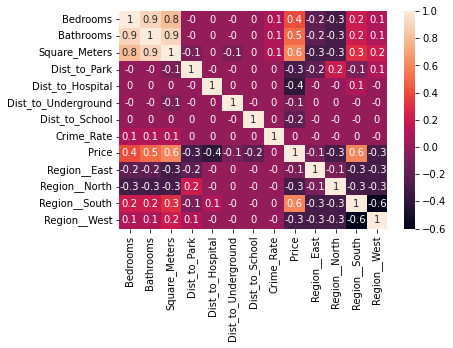

In [1483]:
corr = df.corr().round(1)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

Se debe evitar incluir gráficos si no son explicados a detalle. ¿Qué veo en él? ¿En qué me aporta?

In [1433]:
# We use the dataset without the Price
df_X = df.drop(['Price'], axis=1)

# Perform PCA on the data
pca = PCA(n_components=8)
pca.fit(df_X)

# Transform the data using the PCA components
transformed_data = pca.transform(df_X)

# Store the transformed data in a new dataframe
pca_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

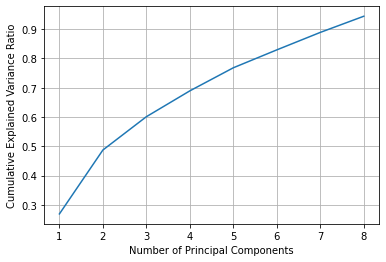

In [1434]:
# Calculate the explained variance ratio for each principal component
cumulative_explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance ratio

fig, ax = plt.subplots()
ax.plot( [1, 2, 3, 4, 5, 6, 7, 8], cumulative_explained_variance_ratio)

# Set x-axis label to integers only
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [1435]:
# Get the loadings of each original variable on each principal component
loadings = pca.components_

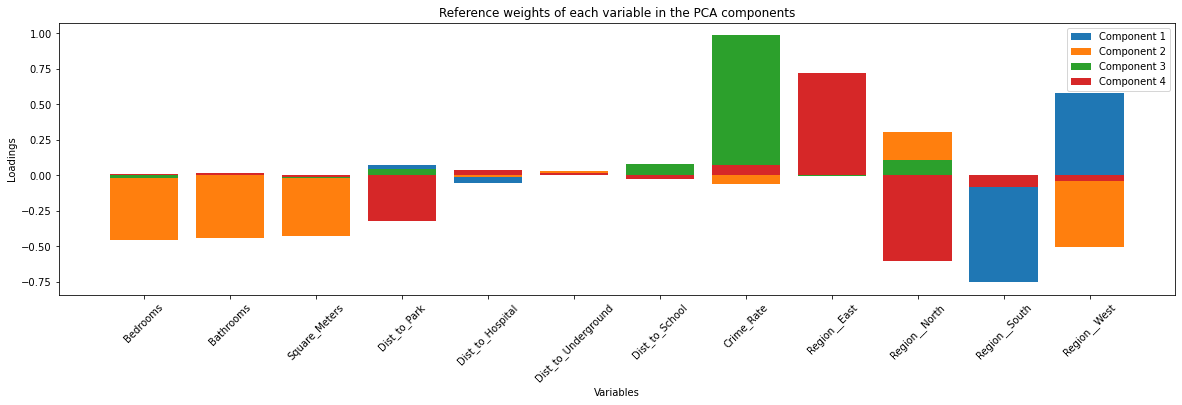

In [1436]:
# Plot the loadings
plt.figure(figsize=(20, 5))  # set the size of the plot
plt.bar(range(len(loadings[0])), loadings[0], label='Component 1')
plt.bar(range(len(loadings[1])), loadings[1], label='Component 2')
plt.bar(range(len(loadings[2])), loadings[2], label='Component 3')
plt.bar(range(len(loadings[3])), loadings[3], label='Component 4')
plt.xticks(range(len(df_X.columns)), df_X.columns, rotation=45)
plt.legend()
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('Reference weights of each variable in the PCA components')
plt.show()

In [1437]:
# We use the dataset without the Price
df_X2 = df.drop(['Price', 'Region__North', 'Region__East', 'Region__South', 'Region__West'], axis=1)

# Perform PCA on the data
pca = PCA(n_components=8)
pca.fit(df_X2)

# Transform the data using the PCA components
transformed_data = pca.transform(df_X2)

# Store the transformed data in a new dataframe
pca_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

In [1438]:
# Get the loadings of each original variable on each principal component
loadings = pca.components_

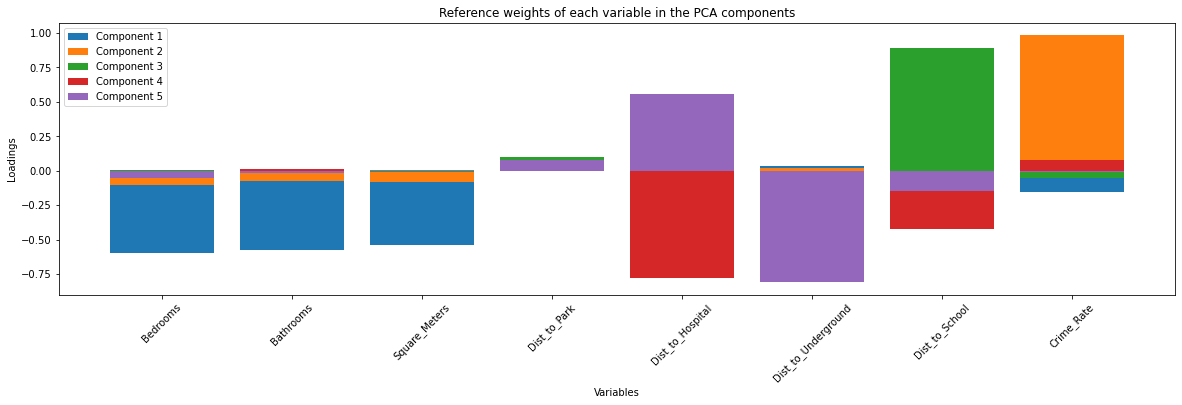

In [1492]:
# Plot the loadings
plt.figure(figsize=(20, 5))  # set the size of the plot
plt.bar(range(len(loadings[0])), loadings[0], label='Component 1')
plt.bar(range(len(loadings[1])), loadings[1], label='Component 2')
plt.bar(range(len(loadings[2])), loadings[2], label='Component 3')
plt.bar(range(len(loadings[3])), loadings[3], label='Component 4')

plt.bar(range(len(loadings[4])), loadings[4], label='Component 5')

plt.xticks(range(len(df_X2.columns)), df_X2.columns, rotation=45)
plt.legend()
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('Reference weights of each variable in the PCA components')
plt.show()

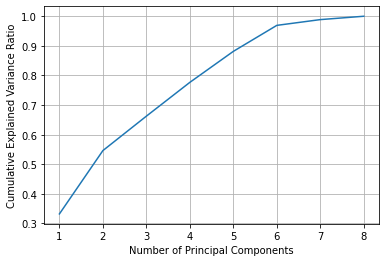

In [1440]:
# Calculate the explained variance ratio for each principal component
cumulative_explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance ratio

fig, ax = plt.subplots()
ax.plot( [1, 2, 3, 4, 5, 6, 7, 8], cumulative_explained_variance_ratio)

# Set x-axis label to integers only
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [1441]:
# Perform PCA on the data
pca = PCA(n_components=6)
pca.fit(df_X2)

# Transform the data using the PCA components
transformed_data = pca.transform(df_X2)

# Store the transformed data in a new dataframe
X = pd.DataFrame(transformed_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [1442]:
X["Region__North"] = df["Region__North"]
X["Region__East"] = df["Region__East"]
X["Region__South"] = df["Region__South"]
X["Region__West"] = df["Region__West"]
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Region__North,Region__East,Region__South,Region__West
0,0.931325,0.638896,-0.119937,0.014361,0.476082,-0.177502,0.0,0.0,1.0,0.0
1,0.598276,0.528885,-0.184528,0.659126,0.140023,-0.154240,0.0,1.0,0.0,0.0
2,0.779043,0.092910,-0.346553,0.137087,-0.111327,0.556003,1.0,0.0,0.0,0.0
3,-0.229999,-0.572178,0.157632,0.312321,0.110540,-0.316310,0.0,0.0,0.0,1.0
4,-0.485528,-0.119841,-0.335804,0.295369,-0.533912,0.496974,0.0,0.0,0.0,1.0


In [1443]:
y = df["Price"]

In [1461]:
from sklearn.model_selection import train_test_split

# Split it into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1462]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Predict on the test data
y_pred = reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.008789897401120992
R^2 Score: 0.7688270081711414


In [1470]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest Regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  max_depth = 5,
                                  min_samples_split=2,
                                  min_samples_leaf=4,
                                  random_state=0)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.010164567404540033
R^2 Score: 0.7326733919267425


In [1469]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be tested
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the random forest regressor
rf = RandomForestRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best hyperparameters to train a new random forest regressor
best_rf = RandomForestRegressor(**grid_search.best_params_)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 0.008337531249601227
R^2 Score: 0.7807241705470747
